# 데이터

## 데이터 준비

In [1]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

2023-01-03 15:46:56.780158: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


170498071/170498071 [==============================] - 374s 2us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


## 데이터 표시

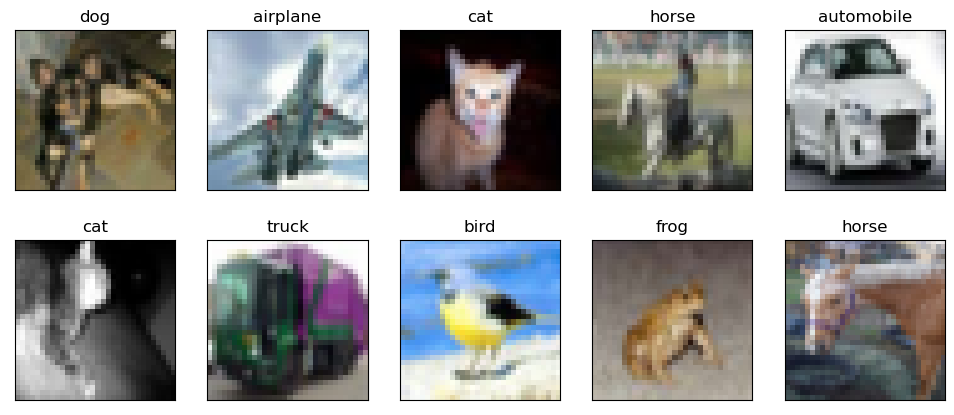

In [3]:
import matplotlib.pyplot as plt
import numpy as np

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

samples = np.random.randint(len(X_train), size=10)

plt.figure(figsize=(12, 5))
for i, idx in enumerate(samples):
    plt.subplot(2, 5, i+1, xticks=[], yticks=[])
    plt.title((class_names[y_train[idx][0]]))
    plt.imshow(X_train[idx])
plt.show()

## 정규화 처리

In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

## 검증 데이터 분리

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
           X_train, y_train, test_size = 0.3,  random_state = 42)
# 데이터가 많기 때문에 8:2 도 충분히 가능

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(35000, 32, 32, 3) (35000, 1)
(15000, 32, 32, 3) (15000, 1)
(10000, 32, 32, 3) (10000, 1)


## 레이블 데이터 shape 변경

In [6]:
y_train = y_train.reshape(-1)
y_val = y_val.reshape(-1)
y_test = y_test.reshape(-1)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(35000,)
(15000,)
(10000,)


## 원-핫 인코딩

In [7]:
import tensorflow as tf

y_train_oh = tf.one_hot(y_train, depth=10)
y_val_oh = tf.one_hot(y_val, depth=10)
y_test_oh = tf.one_hot(y_test, depth=10)

print(y_train_oh.shape)
y_train_oh[:5]

(35000, 10)


2023-01-03 15:53:45.137050: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

## 넘파이 배열 변환

In [8]:
y_train_oh = y_train_oh.numpy()
y_val_oh = y_val_oh.numpy()
y_test_oh = y_test_oh.numpy()

print(y_train_oh.shape)
print(y_val_oh.shape)
print(y_test_oh.shape)

(35000, 10)
(15000, 10)
(10000, 10)


# 모델

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential()
    
    model.add(layers.Conv2D(32, 3, padding = 'same', activation='relu', input_shape = (32, 32, 3)))
    model.add(layers.MaxPooling2D(2))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(64, 3, padding = 'same', activation='relu'))
    model.add(layers.MaxPooling2D(2))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(256, 3, padding = 'same', activation='relu'))
    model.add(layers.MaxPooling2D(2))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(256, 3, padding = 'same', activation='relu'))
    model.add(layers.MaxPooling2D(2))
    model.add(layers.Dropout(0.4))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

In [17]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 8, 8, 64)         

## 학습

In [18]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam,
         loss = 'categorical_crossentropy',
         metrics=['acc'])

EPOCHS = 5
BATCH_SIZE = 256
history = model.fit(X_train, y_train_oh,
           epochs = EPOCHS,
           batch_size = BATCH_SIZE,
           validation_data = (X_val, y_val_oh))

Epoch 1/5
137/137 [==============================] - 105s 767ms/step - loss: 2.1843 - acc: 0.1718 - val_loss: 2.0626 - val_acc: 0.2339
Epoch 2/5
137/137 [==============================] - 103s 755ms/step - loss: 1.9110 - acc: 0.2968 - val_loss: 1.8529 - val_acc: 0.3385
Epoch 3/5
137/137 [==============================] - 102s 744ms/step - loss: 1.7682 - acc: 0.3529 - val_loss: 1.7395 - val_acc: 0.3762
Epoch 4/5
137/137 [==============================] - 115s 838ms/step - loss: 1.6921 - acc: 0.3788 - val_loss: 1.6838 - val_acc: 0.3929
Epoch 5/5
137/137 [==============================] - 119s 869ms/step - loss: 1.6361 - acc: 0.3991 - val_loss: 1.6390 - val_acc: 0.4079


### 학습 곡선

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
    plt.legend()
    
    plt.show()

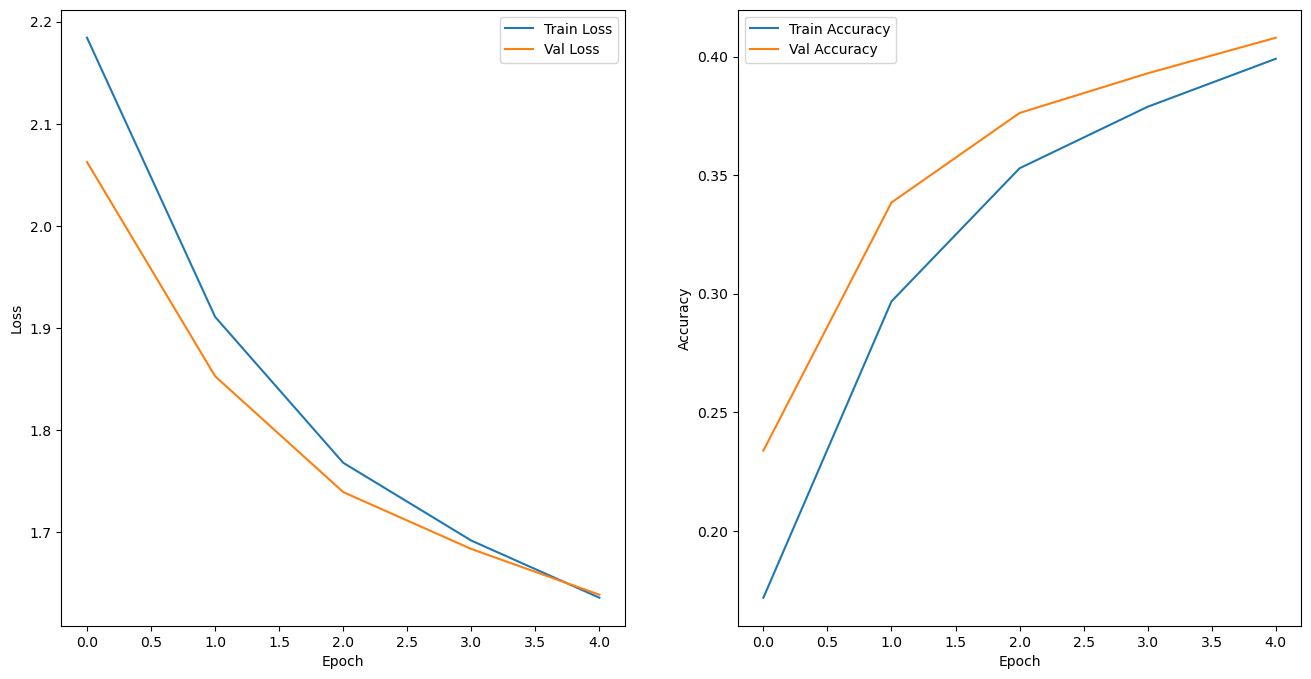

In [20]:
plot_history(history)

# 📌 ModelCheckpoint

## 모델 준비

In [21]:
model = build_model()

adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam,
         loss = 'categorical_crossentropy',
         metrics=['acc'])

## 콜백 준비

In [22]:
from tensorflow.keras import callbacks

checkpoint_path = 'temp/cifar_10.ckpt'
checkpoint = callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, save_best_only=True, monitor='val_loss')
# monitor : 'val_loss' 를 기준으로

## 모델 학습

In [ ]:
EPOCHS = 20
BATCH_SIZE = 256
history = model.fit(X_train, y_train_oh,
           epochs = EPOCHS,
           batch_size = BATCH_SIZE,
           validation_data = (X_val, y_val_oh),
           callbacks=[checkpoint])

## 상태 복원

In [24]:
model.load_weights(checkpoint_path)

## 예측

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_score(y_test, y_pred):
    print('accuracy: %.3f' % (accuracy_score(y_test, y_pred)))
    print('precision: %.3f' % (precision_score(y_test, y_pred, average='macro')))
    print('recall_score: %.3f' % (recall_score(y_test, y_pred, average='macro')))
    print('f1_score: %.3f' % (f1_score(y_test, y_pred, average='macro')))

In [29]:
y_pred = model.predict(X_test)
y_pred_argmax = np.argmax(y_pred, axis=1)

print_score(y_test, y_pred_argmax)

313/313 [==============================] - 9s 29ms/step
accuracy: 0.393
precision: 0.406
recall_score: 0.393
f1_score: 0.371


# 📌 배치 정규화

## 모델 구성

In [30]:
def build_model_bach_normalization():
    model = keras.Sequential()
    
    model.add(layers.Conv2D(32, 3, padding = 'same', input_shape = (32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(2))
    
    model.add(layers.Conv2D(64, 3, padding = 'same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(2))
    
    model.add(layers.Conv2D(256, 3, padding = 'same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(2))
    
    model.add(layers.Conv2D(256, 3, padding = 'same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(2))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

In [31]:
model = build_model_bach_normalization()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)      

## 모델 학습

In [32]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss = 'categorical_crossentropy', metrics=['acc'])

In [33]:
EPOCHS = 5
BATCH_SIZE = 256

history = model.fit(X_train, y_train_oh,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_data = (X_val, y_val_oh))

Epoch 1/5
137/137 [==============================] - 109s 790ms/step - loss: 1.5201 - acc: 0.4579 - val_loss: 2.7439 - val_acc: 0.0959
Epoch 2/5
137/137 [==============================] - 111s 811ms/step - loss: 1.1273 - acc: 0.6031 - val_loss: 2.7706 - val_acc: 0.2599
Epoch 3/5
137/137 [==============================] - 123s 893ms/step - loss: 0.9515 - acc: 0.6716 - val_loss: 2.1765 - val_acc: 0.3149
Epoch 4/5
137/137 [==============================] - 121s 886ms/step - loss: 0.8166 - acc: 0.7224 - val_loss: 1.3383 - val_acc: 0.5287
Epoch 5/5
137/137 [==============================] - 127s 930ms/step - loss: 0.7030 - acc: 0.7662 - val_loss: 1.0820 - val_acc: 0.6204


## 학습 곡선

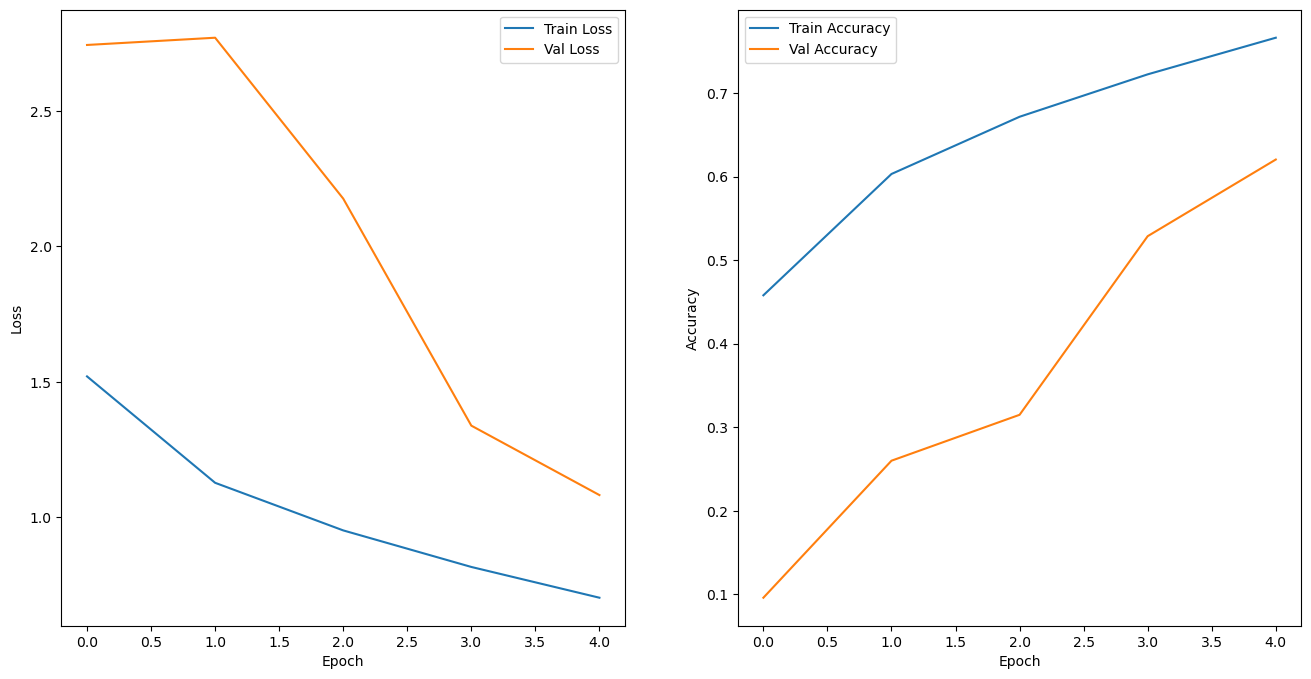

In [34]:
plot_history(history)

## 모델 평가

In [35]:
loss, acc = model.evaluate(X_test, y_test_oh)

print('loss : ', loss)
print('acc : ', acc)

313/313 [==============================] - 12s 38ms/step - loss: 1.0977 - acc: 0.6133
loss :  1.097730278968811
acc :  0.6133000254631042
